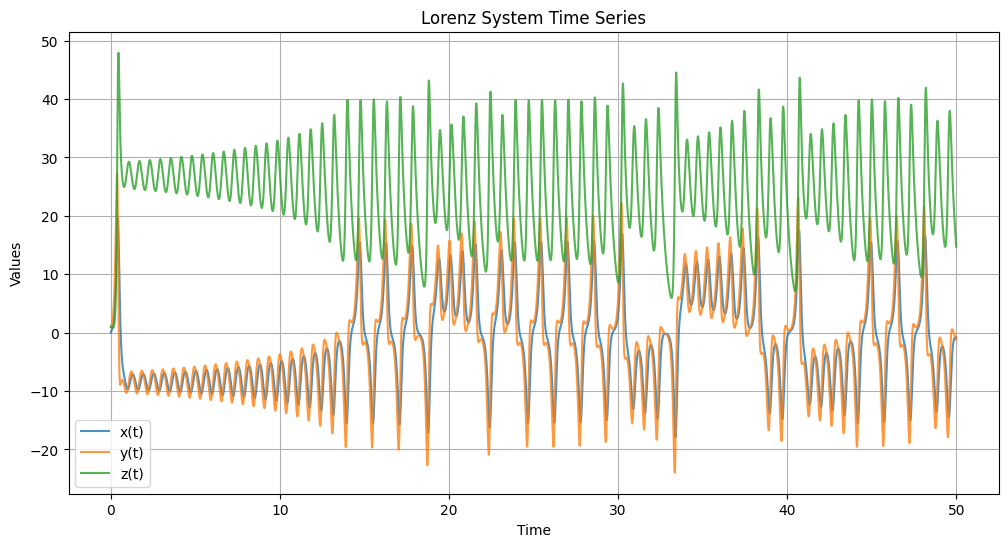

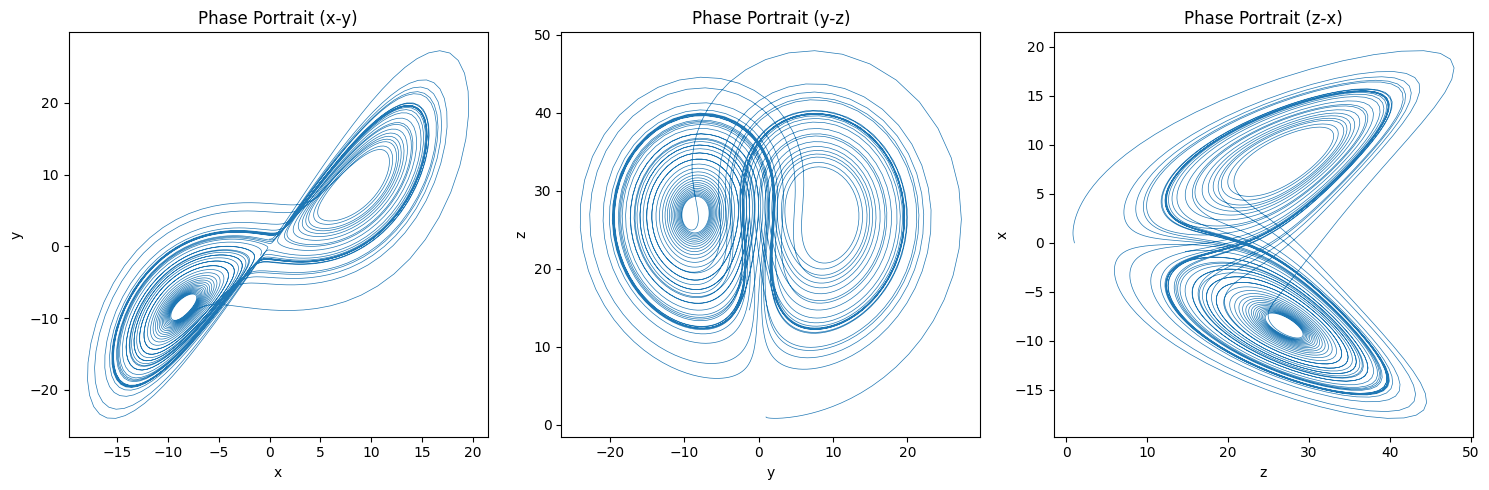

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры системы Лоренца
sigma = 10.0
r = 28.0
b = 8.0 / 3.0

# Начальные условия и параметры интегрирования
x0, y0, z0 = 0.0, 1.0, 1.0  # Начальные условия
t_start = 0.0                 # Начальное время
t_end = 50.0                  # Конечное время
h = 0.01                      # Шаг интегрирования
num_steps = int((t_end - t_start) / h)

# Инициализация массивов
t_values = np.linspace(t_start, t_end, num_steps)
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)
x[0], y[0], z[0] = x0, y0, z0

# Функция вычисления производных
def lorenz_derivs(x, y, z):
    dxdt = sigma * (y - x)
    dydt = r * x - y - x * z
    dzdt = x * y - b * z
    return dxdt, dydt, dzdt

# Метод Рунге-Кутты 4-го порядка
for i in range(num_steps - 1):
    current_x, current_y, current_z = x[i], y[i], z[i]
    
    # Коэффициенты k1
    k1_dx, k1_dy, k1_dz = lorenz_derivs(current_x, current_y, current_z)
    k1_x = h * k1_dx
    k1_y = h * k1_dy
    k1_z = h * k1_dz
    
    # Коэффициенты k2
    k2_dx, k2_dy, k2_dz = lorenz_derivs(
        current_x + k1_x / 2,
        current_y + k1_y / 2,
        current_z + k1_z / 2
    )
    k2_x = h * k2_dx
    k2_y = h * k2_dy
    k2_z = h * k2_dz
    
    # Коэффициенты k3
    k3_dx, k3_dy, k3_dz = lorenz_derivs(
        current_x + k2_x / 2,
        current_y + k2_y / 2,
        current_z + k2_z / 2
    )
    k3_x = h * k3_dx
    k3_y = h * k3_dy
    k3_z = h * k3_dz
    
    # Коэффициенты k4
    k4_dx, k4_dy, k4_dz = lorenz_derivs(
        current_x + k3_x,
        current_y + k3_y,
        current_z + k3_z
    )
    k4_x = h * k4_dx
    k4_y = h * k4_dy
    k4_z = h * k4_dz
    
    # Обновление значений
    x[i+1] = current_x + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
    y[i+1] = current_y + (k1_y + 2*k2_y + 2*k3_y + k4_y) / 6
    z[i+1] = current_z + (k1_z + 2*k2_z + 2*k3_z + k4_z) / 6

# Построение графиков временных зависимостей
plt.figure(figsize=(12, 6))
plt.plot(t_values, x, label='x(t)', alpha=0.8)
plt.plot(t_values, y, label='y(t)', alpha=0.8)
plt.plot(t_values, z, label='z(t)', alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Lorenz System Time Series')
plt.legend()
plt.grid(True)
plt.show()

# Построение фазовых портретов
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x, y, lw=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait (x-y)')

plt.subplot(1, 3, 2)
plt.plot(y, z, lw=0.5)
plt.xlabel('y')
plt.ylabel('z')
plt.title('Phase Portrait (y-z)')

plt.subplot(1, 3, 3)
plt.plot(z, x, lw=0.5)
plt.xlabel('z')
plt.ylabel('x')
plt.title('Phase Portrait (z-x)')

plt.tight_layout()
plt.show()